In [18]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [19]:
secom_data=pd.read_csv("C:/Users/lenovo/Desktop/Unsupervised/PCA_Semiconductor/secom.data",delimiter=" ",header=None)
print(secom_data.shape)

(1567, 590)


In [20]:
secom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [21]:
secom_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [22]:
#checking for NA's
secom_data_na = [secom_data[x].isna().sum() for x in secom_data.columns]
print(sorted(secom_data_na, reverse=True)[:25])
print(sum(secom_data_na))

[1429, 1429, 1429, 1429, 1341, 1341, 1341, 1341, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 1018, 949, 949, 949, 949, 794]
41951


In [23]:
#imputing the nulls with median
secom_imputed_data=secom_data.fillna(secom_data.mean())
secom_imputed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.005396,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.006000,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.014800,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.004400,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.005396,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


In [24]:
sum([secom_imputed_data[x].isna().sum() for x in secom_imputed_data.columns])

0

## Applying standardisation

In [25]:
from sklearn.preprocessing import StandardScaler
standard_data=StandardScaler().fit_transform(secom_imputed_data)
print(standard_data.shape)
standard_data

(1567, 590)


array([[ 2.24309021e-01,  8.49724546e-01, -4.36273028e-01, ...,
        -2.75918755e-15, -6.05437139e-15, -1.66595012e-15],
       [ 1.10713647e+00, -3.82910128e-01,  1.01713652e+00, ...,
         4.11853173e-01,  2.50124370e-01,  1.15668913e+00],
       [-1.11415813e+00,  7.99102486e-01, -4.81289370e-01, ...,
         3.62706333e+00,  3.32141896e+00, -1.79148580e-01],
       ...,
       [-4.85220146e-01, -1.44722022e+00,  1.95858955e-01, ...,
        -8.94680991e-01, -9.71413250e-01, -5.98377708e-01],
       [-1.62724627e+00,  4.50857631e-01, -8.00571057e-01, ...,
         9.11744506e-01,  7.73640493e-01, -6.58194169e-02],
       [-9.46577465e-01, -5.62206979e-01, -1.73736716e-01, ...,
        -3.12323259e-02, -2.73391753e-01,  4.06197683e-01]])

## Covariance of data

In [26]:
covar_matrix = np.matmul(standard_data.T,standard_data)
print(covar_matrix.shape)
covar_matrix

(590, 590)


array([[1567.        , -225.39697711,    7.45209674, ...,  -40.55473168,
         -44.13630259,    6.5406059 ],
       [-225.39697711, 1567.        ,    9.03721057, ...,   27.05651298,
          15.85449596,   70.196658  ],
       [   7.45209674,    9.03721057, 1567.        , ...,  -45.98345727,
         -48.29226299,  -51.53858994],
       ...,
       [ -40.55473168,   27.05651298,  -45.98345727, ..., 1567.        ,
        1526.68989519,  612.40409403],
       [ -44.13630259,   15.85449596,  -48.29226299, ..., 1526.68989519,
        1567.        ,  609.89421083],
       [   6.5406059 ,   70.196658  ,  -51.53858994, ...,  612.40409403,
         609.89421083, 1567.        ]])

## Eigen Values

In [27]:
from scipy.linalg import eigh
values,vectors = eigh(covar_matrix)
print(vectors.shape)
values

(590, 590)


array([-8.43380401e-13, -4.89688580e-13, -4.66953124e-13, -2.77700983e-13,
       -2.32525526e-13, -1.82718274e-13, -1.67295552e-13, -1.61375974e-13,
       -1.46006139e-13, -8.07306840e-14, -7.95490332e-14, -4.38943632e-14,
       -3.70817665e-14, -3.69431124e-14, -3.60627460e-14, -3.54763038e-14,
       -2.90663842e-14, -2.75449868e-14, -2.59381430e-14, -2.54780603e-14,
       -2.32088355e-14, -2.16081663e-14, -1.83497902e-14, -1.73755513e-14,
       -1.66051582e-14, -1.40872346e-14, -1.35358015e-14, -1.27759754e-14,
       -1.24391194e-14, -1.21981005e-14, -1.14877698e-14, -9.74795962e-15,
       -8.69851692e-15, -7.48105631e-15, -7.20166153e-15, -5.88950863e-15,
       -4.49728299e-15, -4.42707892e-15, -2.56271073e-15, -2.39301363e-15,
       -2.12111047e-15, -1.61658819e-16, -1.57083475e-16, -1.54945909e-16,
       -1.41121306e-16, -7.72804020e-17, -5.67149001e-17, -5.66880619e-17,
       -4.09020113e-17, -3.23253779e-17, -1.79852812e-17, -1.60785061e-17,
       -4.71657932e-18, -

## PCA


In [28]:
from sklearn import decomposition
pca = decomposition.PCA(standard_data)
pca.n_components = 590 #vectors shape
pca_data = pca.fit_transform(standard_data)

In [29]:
pca_data
pca.explained_variance_

array([2.63681110e+01, 1.71913388e+01, 1.33675887e+01, 1.20118513e+01,
       1.04415063e+01, 9.86656944e+00, 9.36551604e+00, 8.71306604e+00,
       8.53207372e+00, 7.68833814e+00, 6.94418399e+00, 6.35199284e+00,
       6.21510921e+00, 6.04904198e+00, 5.99223403e+00, 5.63482838e+00,
       5.44546098e+00, 5.40806860e+00, 5.29073698e+00, 5.04547192e+00,
       4.88898350e+00, 4.79406359e+00, 4.70930427e+00, 4.57188946e+00,
       4.53503317e+00, 4.43989399e+00, 4.38436461e+00, 4.21923459e+00,
       4.12134621e+00, 4.00967067e+00, 3.95769743e+00, 3.89828293e+00,
       3.84216606e+00, 3.77201049e+00, 3.67133367e+00, 3.64016508e+00,
       3.58847286e+00, 3.53265321e+00, 3.46532034e+00, 3.40645456e+00,
       3.36024050e+00, 3.30306837e+00, 3.20374139e+00, 3.18271067e+00,
       3.14125180e+00, 3.11882393e+00, 3.06744071e+00, 2.97077306e+00,
       2.95095400e+00, 2.87897625e+00, 2.85044828e+00, 2.83668007e+00,
       2.78311882e+00, 2.68411768e+00, 2.65599336e+00, 2.64706330e+00,
      

In [30]:
#Plotting Preserved Variance
var=values/np.sum(values)*100
components= list(range(len(var)))
cumulative_var = np.cumsum(var)

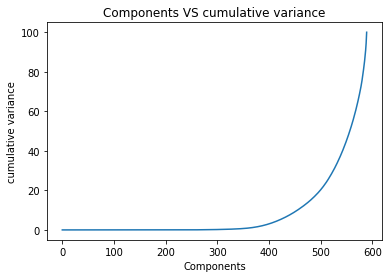

In [31]:
plt.plot(cumulative_var)
plt.xlabel("Components")
plt.ylabel("cumulative variance")
plt.title("Components VS cumulative variance")
plt.show()

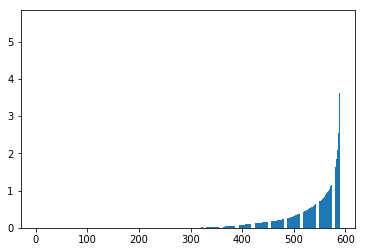

In [32]:
plt.bar(components,var,align='edge')
plt.show()

## Top 7 Principal Components

In [33]:
pca.n_components=7
principal7Components = pca.fit_transform(standard_data)
TOP_7 = pd.DataFrame(data=principal7Components,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [34]:
TOP_7

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.688352,2.881440,3.787669,-2.664928,-0.618471,-1.137464,-1.863731
1,-2.232032,0.793791,2.800242,-2.084361,-0.626780,-1.520700,-2.217039
2,0.414665,1.129042,1.252934,-0.466096,0.381512,2.295264,-2.204373
3,1.167230,5.234269,4.704051,-4.163398,1.631177,2.264333,-6.833215
4,0.780272,2.390926,2.576016,-0.186013,1.582951,3.709158,-4.406315
5,2.106359,2.861188,3.688461,-2.623374,0.852622,3.713644,-2.277347
6,-1.744248,4.491479,2.811067,-1.545286,0.013999,-1.203293,-3.063092
7,1.316480,1.895691,4.693996,-2.502828,-0.536846,1.592162,-2.223787
8,-0.492121,19.233003,-3.139243,3.334356,0.174213,2.537177,-0.432031
9,1.319235,3.854772,5.689660,-3.229911,-0.243232,2.630372,-2.203250
